# Alt-chain temporal study
## Monero Archival Project

IsthmusCrypto 2018.07

Here, alt-chain ("block1") data is compared against main-chain.

Specifically, we note patterns in times between subsequent blocks.

Objectives:
-  What does the timing suggest regarding alternate chains
-  If consistent timing within a given side chain, estimate hashpower
-  If consistent timing across side chains, suggests single player
-  Check to see if the hashpower sunk into side chains disappears from main chain

## Import libraries

In [1]:
import pandas as pd
from copy import copy
import datetime
import numpy as np
import matplotlib.pyplot as plt

## Where are files saved?

In [2]:
block0s_relative_path = 'altchain_logs/block0s.txt'
block1s_relative_path = 'altchain_logs/block1s.txt'

## Import files

In [3]:
b0s_raw = pd.read_csv(block0s_relative_path)
b1s_raw = pd.read_csv(block1s_relative_path)

# Modify this version:
b0s = copy(b0s_raw)
b1s = copy(b1s_raw)

### Sneak a peek at the data

Typically, see duplicates.

b0, or b1. Here, b1

In [4]:
print(type(b1s_raw))
b1s_raw[0:20]

<class 'pandas.core.frame.DataFrame'>


,block_time,block_height,block_nonce,block_random
0,1522901487,1545098,2684357998,11314
1,1522901487,1545098,2684357998,11935
2,1522901487,1545098,2684357998,14423
3,1522901487,1545098,2684357998,16546
4,1522901487,1545098,2684357998,16865
5,1522901487,1545098,2684357998,17566
6,1522901487,1545098,2684357998,19975
7,1522901487,1545098,2684357998,24988
8,1522901487,1545098,2684357998,27186
9,1522901487,1545098,2684357998,27796


## De-duplicate

In [5]:
b0s.drop(['block_random'],1,inplace=True)
b0s=b0s.drop_duplicates()

b1s.drop(['block_random'],1,inplace=True)
b1s=b1s.drop_duplicates()
b1s[0:20]

,block_time,block_height,block_nonce
0,1522901487,1545098,2684357998
14,1523003051,1546000,570430823
648,1523337099,1547963,2139397
650,1525032170,1562061,3579158795
655,1525032261,1562062,2970728396
660,1525219207,1563626,668103
661,1525470502,1565690,589661
667,1525470534,1565691,358009781
673,1525470959,1565692,2863312291
679,1525472810,1565693,1073825901


## Generate differenece coulmns

In [6]:
b0s['delta_height'] = b0s['block_height']-b0s['block_height'].shift()
b0s['delta_time'] = b0s['block_time']-b0s['block_time'].shift()

b1s['delta_height'] = b1s['block_height']-b1s['block_height'].shift()
b1s['delta_time'] = b1s['block_time']-b1s['block_time'].shift()

## Drop rows with jumps (delta_height > 1)

In [52]:
b0s = b0s[b0s.delta_height == 1]
b1s = b1s[b1s.delta_height == 1]

## What are we left with?

In [55]:
print('Retained ' + str(len(b0s)) + ' main-chain blocks')
print('Retained ' + str(len(b1s)) + ' side-chain blocks')

Retained 16486 main-chain blocks
Retained 186 side-chain blocks


## Study block times

In [25]:
b0_mean_time_s = np.mean(b0s.delta_time)
b1_mean_time_s = np.mean(b1s.delta_time)

print('Main-chain blocks come with mean time: ' + str(round(b0_mean_time_s)) + ' seconds = ' + str(round(b0_mean_time_s/60,1)) + ' min')
print('Side-chain blocks come with mean time: ' + str(round(b1_mean_time_s)) + ' seconds = ' + str(round(b1_mean_time_s/60,1)) + ' min')

Main-chain blocks come with mean time: 117 seconds = 1.9 min
Side-chain blocks come with mean time: 5538 seconds = 92.3 min


### Visualize In terms of seconds

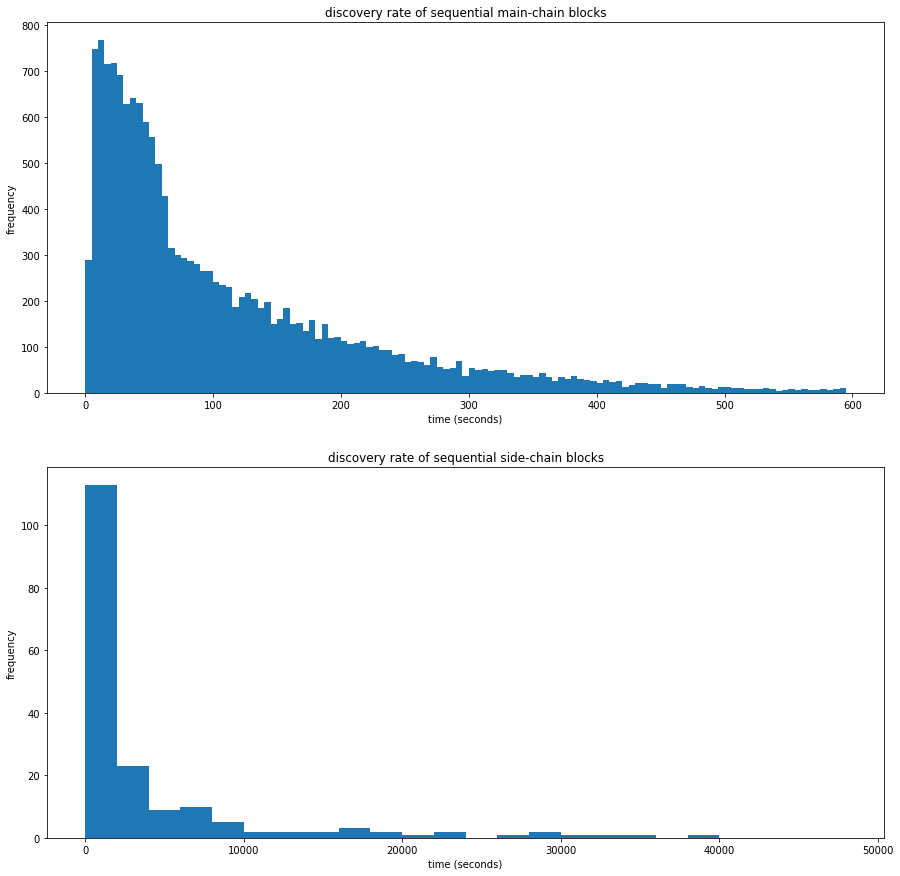

In [84]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('time (seconds)')
ax1.set_ylabel('frequency')
ax1.set_title('discovery rate of sequential main-chain blocks')
plt.hist(b0s.delta_time, bins=range(0,600,5))
ax2 = fig.add_subplot(212)
plt.hist(b1s.delta_time, bins=range(0,50000,2000))
ax2.set_xlabel('time (seconds)')
ax2.set_ylabel('frequency')
ax2.set_title('discovery rate of sequential side-chain blocks')
pass

### In terms of "normal block time" i.e. mean of b0s.delta_height

Text(0.5,1,'discovery rate of sequential side-chain blocks, normalized to 120 s')

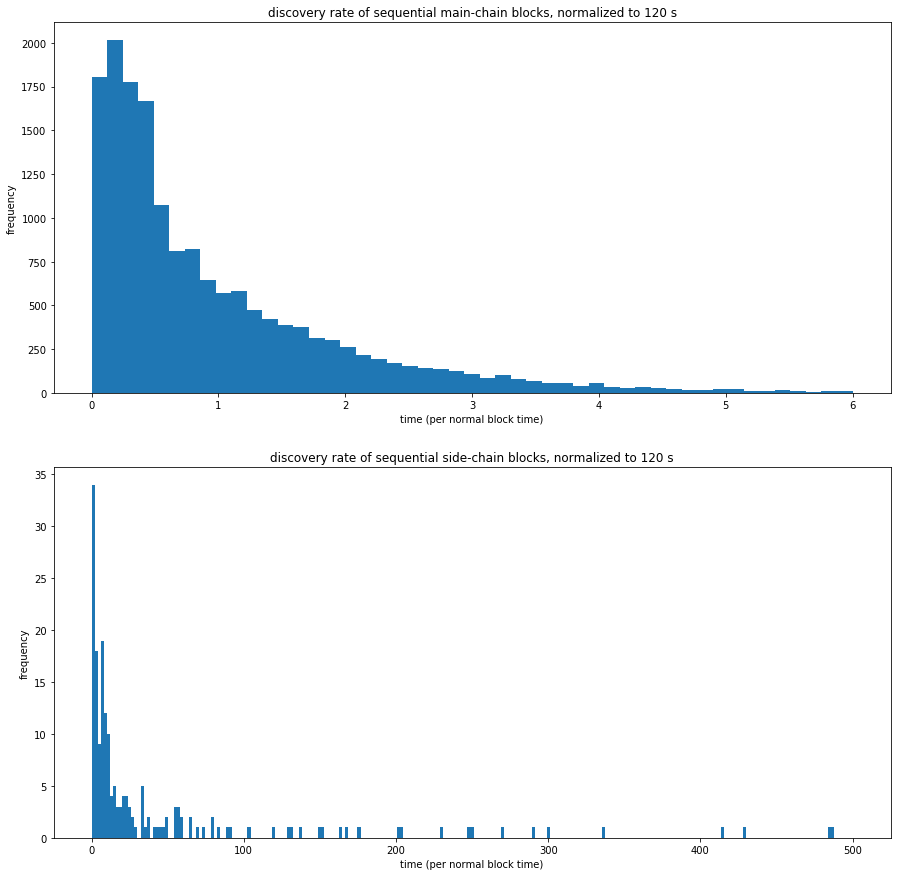

In [85]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(211)
plt.hist(b0s.delta_time/b0_mean_time_s, bins=np.linspace(0,6,50))
ax1.set_xlabel('time (per normal block time)')
ax1.set_ylabel('frequency')
ax1.set_title('discovery rate of sequential main-chain blocks, normalized to 120 s')



ax2 = fig.add_subplot(212)
plt.hist(b1s.delta_time/b0_mean_time_s, bins=np.linspace(0,500,250))
ax2.set_xlabel('time (per normal block time)')
ax2.set_ylabel('frequency')
ax2.set_title('discovery rate of sequential side-chain blocks, normalized to 120 s')

## Plot discovery time as a function of length of side chain

In [ ]:
pass